      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

No. of Total passengers gender wise :
male      843
female    466
Name: sex, dtype: int64
Titan DF status to find missing values:
pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
embarked      2
dtype: int64
Titan DF info output
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 92.1+ KB
None
Deleting Missing Data
Titan DF info output after deleting missing data
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
embarked    0
dtype: int64
<class 'pandas

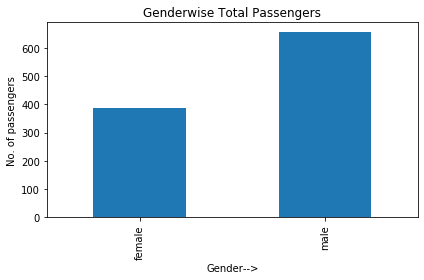

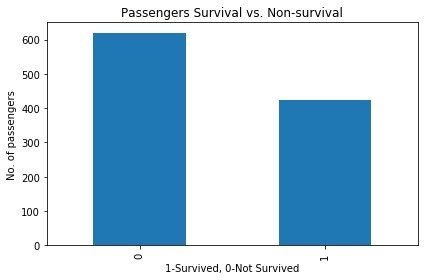

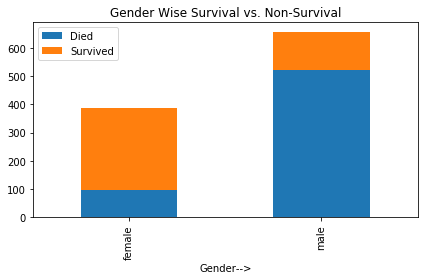

Class wise no.of passengers
3    501
1    282
2    261
Name: pclass, dtype: int64


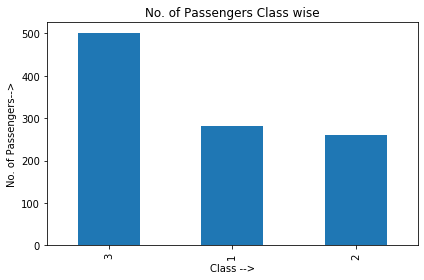

No. of passengers class wise, gender wise
pclass  sex   
1       female    131
        male      151
2       female    103
        male      158
3       female    152
        male      349
dtype: int64


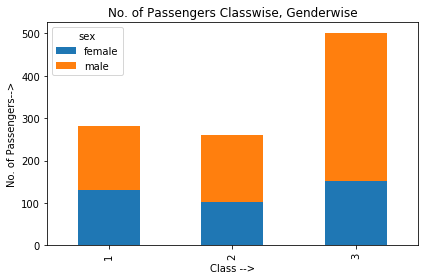

Class wise Survival vs. Non-Survival
pclass  survived
1       0           103
        1           179
2       0           146
        1           115
3       0           370
        1           131
dtype: int64


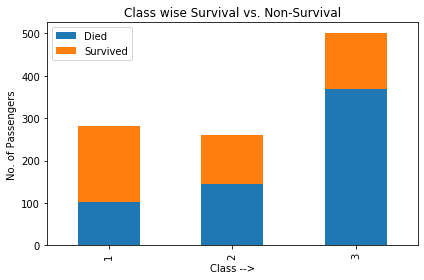

Class wise Survival vs. Non Survival of 
child passengers(age<18)
pclass  survived
1       0            2
        1           13
2       0            4
        1           29
3       0           67
        1           39
dtype: int64


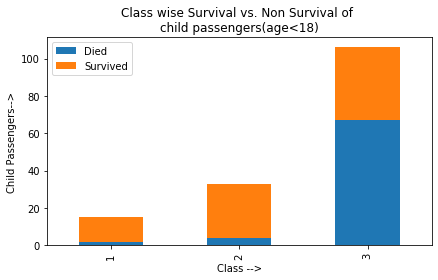

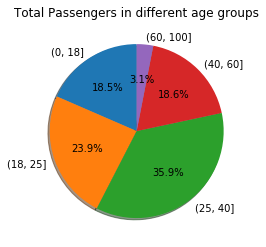

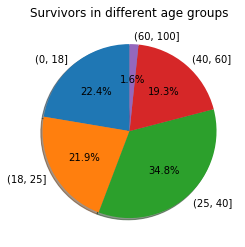

In [2]:
# titanic_proj6.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

titan_df = pd.read_excel(r'/media/amit/Work/GitHub/Machine Learning with Python/Project/titanic.xls')
print(titan_df)

s = titan_df['sex'].value_counts()
print('No. of Total passengers gender wise :')
print(s)

#--------------------------------
# Data Wrangling
print('Titan DF status to find missing values:')
print(titan_df.isnull().sum())
print('Titan DF info output')
print(titan_df.info())
print('Deleting Missing Data')
titan_df = titan_df.dropna(axis = 0, how ='any')
print('Titan DF info output after deleting missing data')
print(titan_df.isnull().sum())
print(titan_df.info())

#-------------------------------
s = titan_df["survived"].value_counts()
print('Not Survived of Total passengers:', s[0])
print('Survived of Total passengers:', s[1])
 
s= titan_df['survived'].value_counts(normalize = True)
print(s[0], s[1])
print('Percentage of Total Non Survival : %.2f' % (s[0] * 100))
print('Percentage of Total Survival : %.2f'  % (s[1] * 100))            

# Number of males survived vs. not-survived
s = titan_df['survived'][titan_df['sex'] == 'male'].value_counts()
print('Total males not survived :', s[0])
print('Total males survived :', s[1])
s = titan_df['survived'][titan_df['sex'] == 'male'].value_counts(normalize = True)
print(s)
print('Percentage of males not survived : %.2f' % (s[0]*100))
print('Percentage of males survived : %.2f' % (s[1]*100))

# Number of females survived vs. not-survived
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts()
print('Total females not survived :', s[0])
print('Total females survived :', s[1])
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts(normalize = True)
print(s)
print('Percentage of females not survived : %.2f' % (s[0]*100))
print('Percentage of females survived : %.2f' % (s[1]*100))

#-------------------------------------
# Create a feature called 'child'
# since it's probable that children were saved first.
# We test by creating a new column with a
# categorical variable called 'child'.
# child = 1 for age < 18 and child = 0 when age >= 18

titan_df["child"] = float('NaN')
titan_df['child'][titan_df['age'] < 18] = 1
titan_df['child'][titan_df['age'] >= 18] = 0

# Print normalized Survival Rates for passengers under 18
s = titan_df["survived"][titan_df["child"] == 1].value_counts(normalize = True)
print(s)
print('Percentage Not Survived under age 18 : %.2f' % (s[0] * 100))
print('Percentage Survived under age 18 : %.2f' % (s[1] * 100))
      
# Print normalized Survival Rates for passengers 18 or older (>= 18)
s = titan_df["survived"][titan_df["child"] == 0].value_counts(normalize = True)
print(s)
print('Percentage Not Survived for age >= 18 : %.2f' % (s[0] * 100))
print('Percentage Survived for age >= 18 : %.2f' % (s[1] * 100))

#---------------------------------------
# Now data visualization using matplotlib
#---------------------------------------
# Breakup of total passengers genderwise
titan_df.groupby(['sex']).size().plot(kind='bar',stacked=True)
plt.title('Genderwise Total Passengers')
plt.ylabel('No. of passengers')
plt.xlabel('Gender-->')
plt.tight_layout()
plt.show()

# Breakup of passengers survival vs. non-survival 
titan_df.groupby(['survived']).size().plot(kind='bar')
plt.title('Passengers Survival vs. Non-survival')
plt.ylabel('No. of passengers')
plt.xlabel('1-Survived, 0-Not Survived')
plt.tight_layout()
plt.show()

# Gender wise Survival vs. Non-survival rate  
titan_df.groupby(['sex','survived']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Gender Wise Survival vs. Non-Survival')
plt.xlabel('Gender-->')
plt.legend(['Died', 'Survived'])
plt.tight_layout()
plt.show()

# No. of passengers Class wise 
print('Class wise no.of passengers')
print(titan_df['pclass'].value_counts())
titan_df['pclass'].value_counts().plot(kind='bar')
plt.title('No. of Passengers Class wise')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers-->')
plt.tight_layout()
plt.show()

# No of passengers class wise, genderwise
print('No. of passengers class wise, gender wise')
print(titan_df.groupby(['pclass', 'sex']).size())
titan_df.groupby(['pclass', 'sex']).size().unstack().plot(kind='bar', stacked=True)
plt.title('No. of Passengers Classwise, Genderwise')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers-->')
plt.tight_layout()
plt.show()
 
# Class wise survival vs. non-survival
print('Class wise Survival vs. Non-Survival')
print(titan_df.groupby(['pclass', 'survived']).size())
titan_df.groupby(['pclass', 'survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non-Survival')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers')
plt.legend(['Died', 'Survived'])
plt.tight_layout()
plt.show()

# Class wise Survival vs. Non-survival of child passengers( age < 18)
print('Class wise Survival vs. Non Survival of \nchild passengers(age<18)') 
print(titan_df[titan_df.child==1].groupby(['pclass', 'survived']).size())
titan_df[titan_df.child==1].groupby(['pclass','survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non Survival of \nchild passengers(age<18)')
plt.tight_layout()
plt.legend(['Died','Survived'])
plt.xlabel('Class -->')
plt.ylabel('Child Passengers-->')
plt.show()

# Pie chart
age_bin = [0, 18, 25, 40, 60, 100]     # defined age bin intervals
# create the bins
titan_df['AgeBin'] = pd.cut(titan_df.age, bins=age_bin)
d_temp = titan_df[np.isfinite(titan_df['age'])]    # removing null rows
# Number of survivors based on age bin
survivors = d_temp.groupby('AgeBin')['survived'].agg(sum)
# Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['survived'].agg('count')
# Plot pie chart
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

In [67]:
# titanic_proj6.py

from tkinter import *
from tkinter import messagebox as msg
from tkintertable import TableCanvas,TableModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

def calculate():
    root = Tk()
    root.title("Sample.csv")
    root.geometry('800x400')
    obj=TestApp(root)

class TestApp():
    def __init__(self,root):
        self.f=Frame(root,height=200,width=100)
        self.f.pack(fill=BOTH,expand=1)
        self.table=TableCanvas(self.f,read_only=True)

        titan_df = pd.read_excel(r'/media/amit/Work/GitHub/Machine Learning with Python/Project/titanic.xls')
        titan_df.to_csv(r'/media/amit/Work/GitHub/Machine Learning with Python/Project/titanic.csv',index=None,header=True)
        self.table.importCSV(r'/media/amit/Work/GitHub/Machine Learning with Python/Project/titanic.csv')

        print(self.table.model.columnNames)
        self.table.show()

        print(titan_df)

        s = titan_df['sex'].value_counts()
        print('No. of Total passengers gender wise :')
        print(s)
        print('Titan DF status to find missing values:')
        print(titan_df.isnull().sum())
        print('Titan DF info output')
        print(titan_df.info())
        print('Deleting Missing Data')
        titan_df = titan_df.dropna(axis = 0, how ='any')
        print('Titan DF info output after deleting missing data')
        print(titan_df.isnull().sum())
        print(titan_df.info())


#----------------------------------------     
root = Tk()
root.title('New Principal')
root.geometry('600x400')

# Creating widgets
calc_button = Button(root,text='Wrangling', font=('Arial', 14), bg='Orange', fg='Black',command=calculate)
# reset_button = Button(root,text='Clear', font=('Arial', 14), bg='Khaki', fg='Black', command=reset)
# exit_button = Button(root,text='Exit', font=('Arial', 14), bg='Yellow', fg='Black', command=root.destroy)

# Placing widgets using grid manager

calc_button.place(x=100,y=100)
# reset_button.place(x=250,y=100)
# exit_button.place(x=330,y=100)

# Focus the mouse on salary entry

# mainloop
root.mainloop()

['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'embarked']
      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John 